In [2]:
from dementia_inequalities import const, log, utils, tools
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from scipy.stats import norm, lognorm
import scipy.stats

In [24]:
# Define the font path and style path
FONT_PATH = const.raw_data_path + '/JosefinSans-Regular.ttf'
STYLEPATH = const.raw_data_path + '/autonomy_white.mplstyle'

# Add the font to the font manager
fm.fontManager.addfont(FONT_PATH)

# Set the font family for matplotlib to use
plt.rcParams['font.family'] = 'Josefin Sans'
plt.style.use(STYLEPATH)

# Inform the user that the font was set
print("Josefin Sans font set for Matplotlib.")
print("mplstyle activated.")

Josefin Sans font set for Matplotlib.
mplstyle activated.


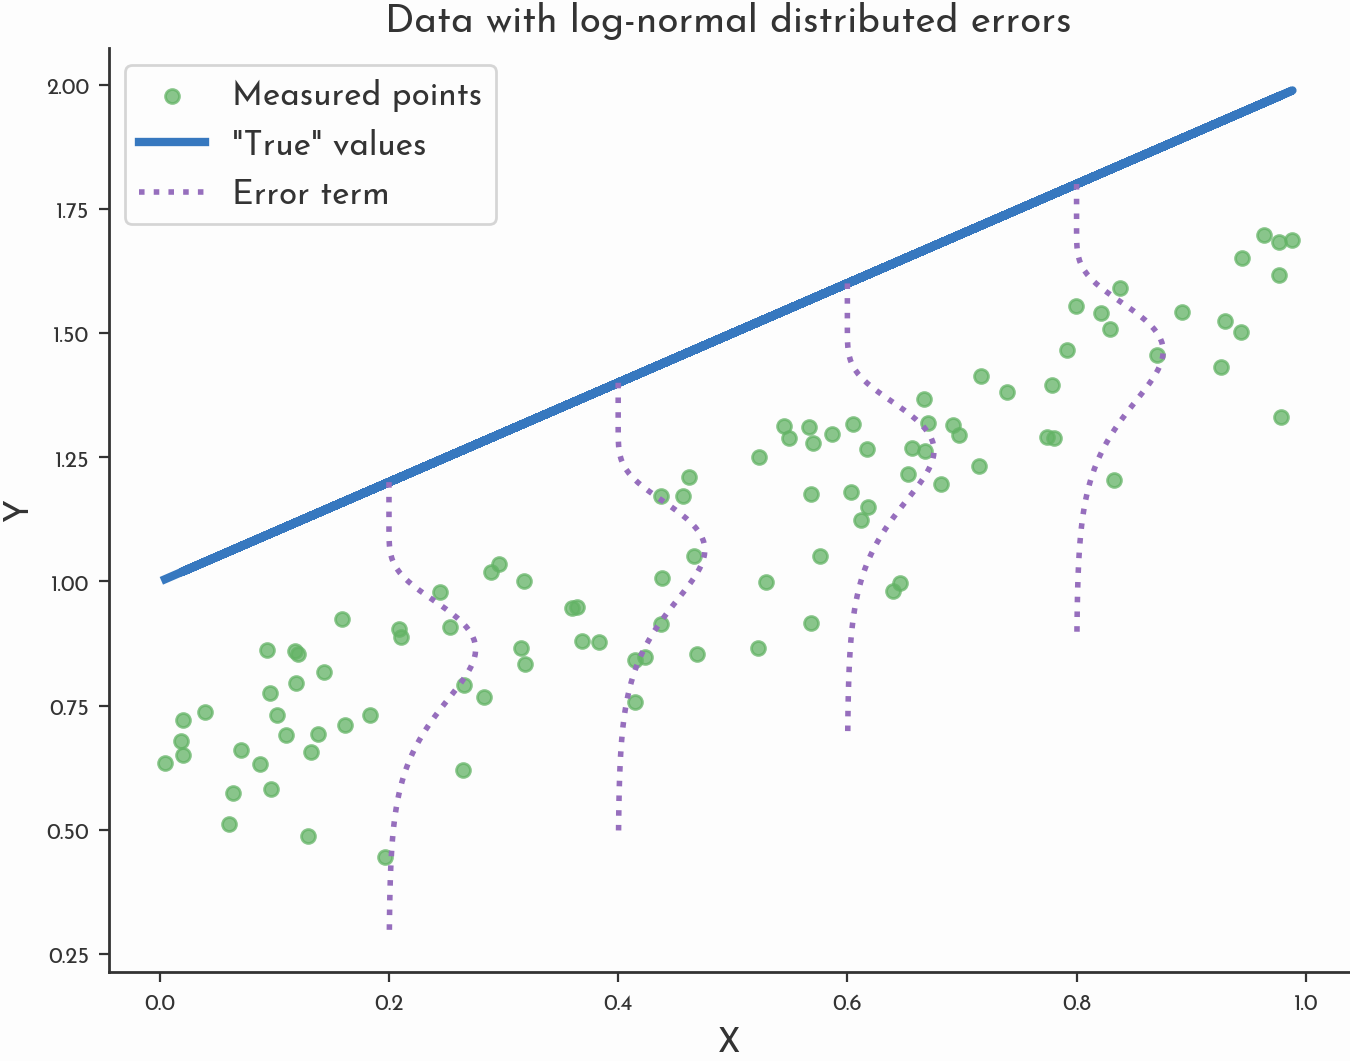

In [23]:
#|code-fold:true

def f(x, k, m):
    return k*x + m

# Parameters for the log-normal distribution
# For a log-normal distribution, the parameters s, scale, and loc are used where:
# s is the sigma (standard deviation) of the log of the distribution,
# scale is exp(mu) where mu is the mean of the log of the distribution,
# loc is usually set to 0 for a standard log-normal distribution.
s = 0.3  # standard deviation of the log of the distribution
mu = -1  # mean of the log of the distribution, exp(mu) is the scale parameter

# Generating random data
np.random.seed(0)
N = 100
x = np.random.rand(N)
# Generating log-normally distributed errors, scale=exp(mu) is used for the mean of the underlying normal distribution
e = np.random.lognormal(mu, s, N)
y_true = f(x, 1, 1)
y = f(x, 1, 1) - e

# Plotting the scatter data and regression line
plt.figure(figsize=(8,6), dpi=200)
plt.scatter(x, y, label='Measured points', color='xkcd:boring green', alpha=0.75)
plt.plot(x, y_true, color='xkcd:windows blue', label='"True" values')

#x1 = np.arange(0,1.1, 0.1)
#y1 = f(x1, 1, 1) - 0.42
#plt.plot(x1, y1, ':', color='hotpink', label='"Observed" values')

# X positions for the PDFs
x_positions = [0.2, 0.4, 0.6, 0.8]

# Generating PDFs for the specified x positions
for xpos in x_positions:
    # Create a range of y values for plotting the PDF, focusing on the positive range relevant for log-normal
    y_range = np.linspace(0, np.max(e) * 1.2, 100)
    pdf = lognorm.pdf(y_range, s=s, scale=np.exp(mu))
    
    # Scaling the PDF to make it visible on the plot, adjust scale factor as needed
    scale_factor = 0.02
    pdf_scaled = pdf * scale_factor + xpos
    
    # Plotting the PDF
    plt.plot(pdf_scaled, -y_range + f(xpos, 1, 1), ':', color='xkcd:deep lilac', label="Error term", linewidth=2)  # Adjusted plotting for half-normal

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Data with log-normal distributed errors', fontsize=14)
# To avoid duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=12)
plt.show()
